# Laporan Proyek Machine Learning - Rizki Wahyu Nurcahyani Fajarwati 
- **Nama:** Rizki Wahyu Nurcahyani Fajawrati
- **Email:** a123xbf441@devacademy.id
- **ID Dicoding:** a123xbf441

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, Normalizer, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

## Data Understanding

Baris kode dibawah ini digunakan untuk membaca file CSV bernama weather_classification_data.csv. File CSV tersebut berisi dataset cuaca yang akan digunakan untuk analisis atau pemodelan. Hasil pembacaan disimpan dalam variabel df (dataframe). Kemudian menggunakan head() untuk menampilkan 5 baris pertama dari dataframe df. Ini berguna untuk melihat struktur awal data, seperti nama kolom, tipe data, dan isi dari beberapa baris awal.

In [3]:
df = pd.read_csv("weather_classification_data.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (13200, 11)
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        R

Descriptive merupakan fungsi yang digunakan untuk menghasilkan statistik deskriptif dari kolom-kolom numerik di dalam dataframe df.
Statistik yang ditampilkan mencakup:
- count: jumlah nilai yang tidak kosong (non-NaN),
- mean: nilai rata-rata,
- std: standar deviasi (penyebaran data),
- min: nilai minimum,
- 25%, 50%, 75%: kuartil 1, median, dan kuartil 3,
- max: nilai maksimum.

In [4]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
         Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000

Mengambil semua nama kolom dari dataframe df lalu menghitung berapa banyak baris dan kolom grid yang dibutuhkan agar semua fitur bisa divisualisasikan dalam 4 subplot. Kemudian membuat figure dan axes menggunakan matplotlib, lalu mengubah susunannya agar mudah diakses satu per satu. Dilakukan iterasi untuk setiap kolom dan dibuatkan histogramnya dengan judul masing-masing setiap diagramnya agar mudah untuk dibaca. 

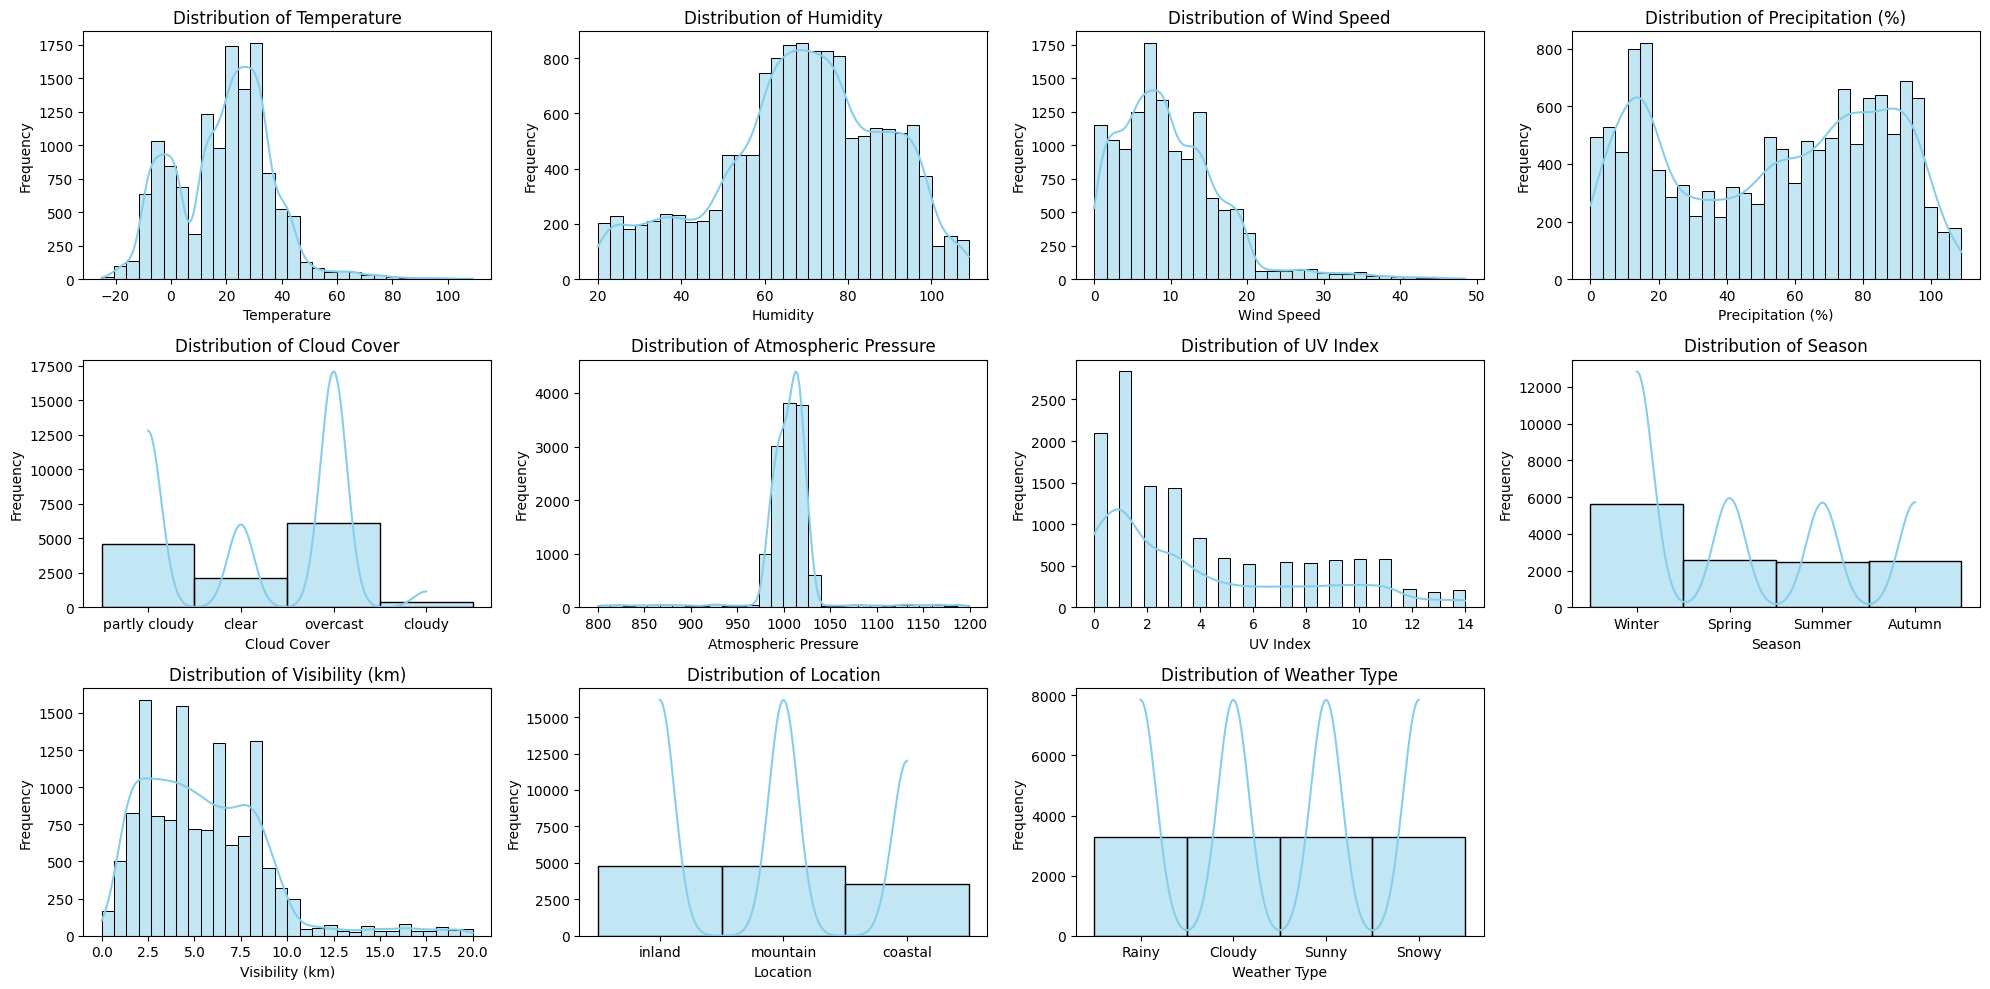

In [5]:
cols = df.columns.to_list()
n_cols = 4
n_rows = -(-len(cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [7]:
cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Cloud Cover',
 'Atmospheric Pressure',
 'UV Index',
 'Season',
 'Visibility (km)',
 'Location',
 'Weather Type']

Langkah ini digunakan untuk membuat visualisasi korelasi antara fitur numerik dalam dataset, dalam bentuk heatmap. Dengan adanya langkah ini, dapat mengetahui fitur mana yang saling berkorelasi tinggi atau sangat berhubungan.

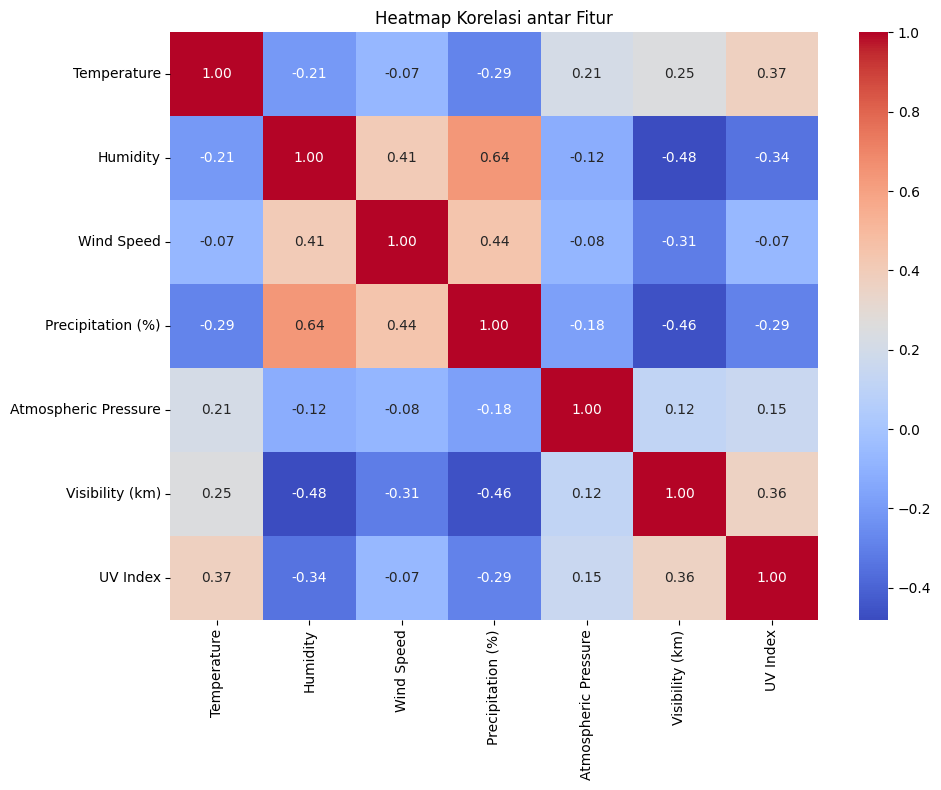

In [10]:
df_selected = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)','Atmospheric Pressure','Visibility (km)', 'UV Index']]
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Fitur')
plt.tight_layout()
plt.show()

Langkah ini digunakan untuk mengecek outlier dari fitur numerik dalam dataset menggunakan boxplot, yaitu jenis grafik statistik yang sangat efektif untuk mendeteksi nilai ekstrem. Outlier penting untuk diidentifikasi karena dapat memengaruhi rata-rata atau model machine learning.

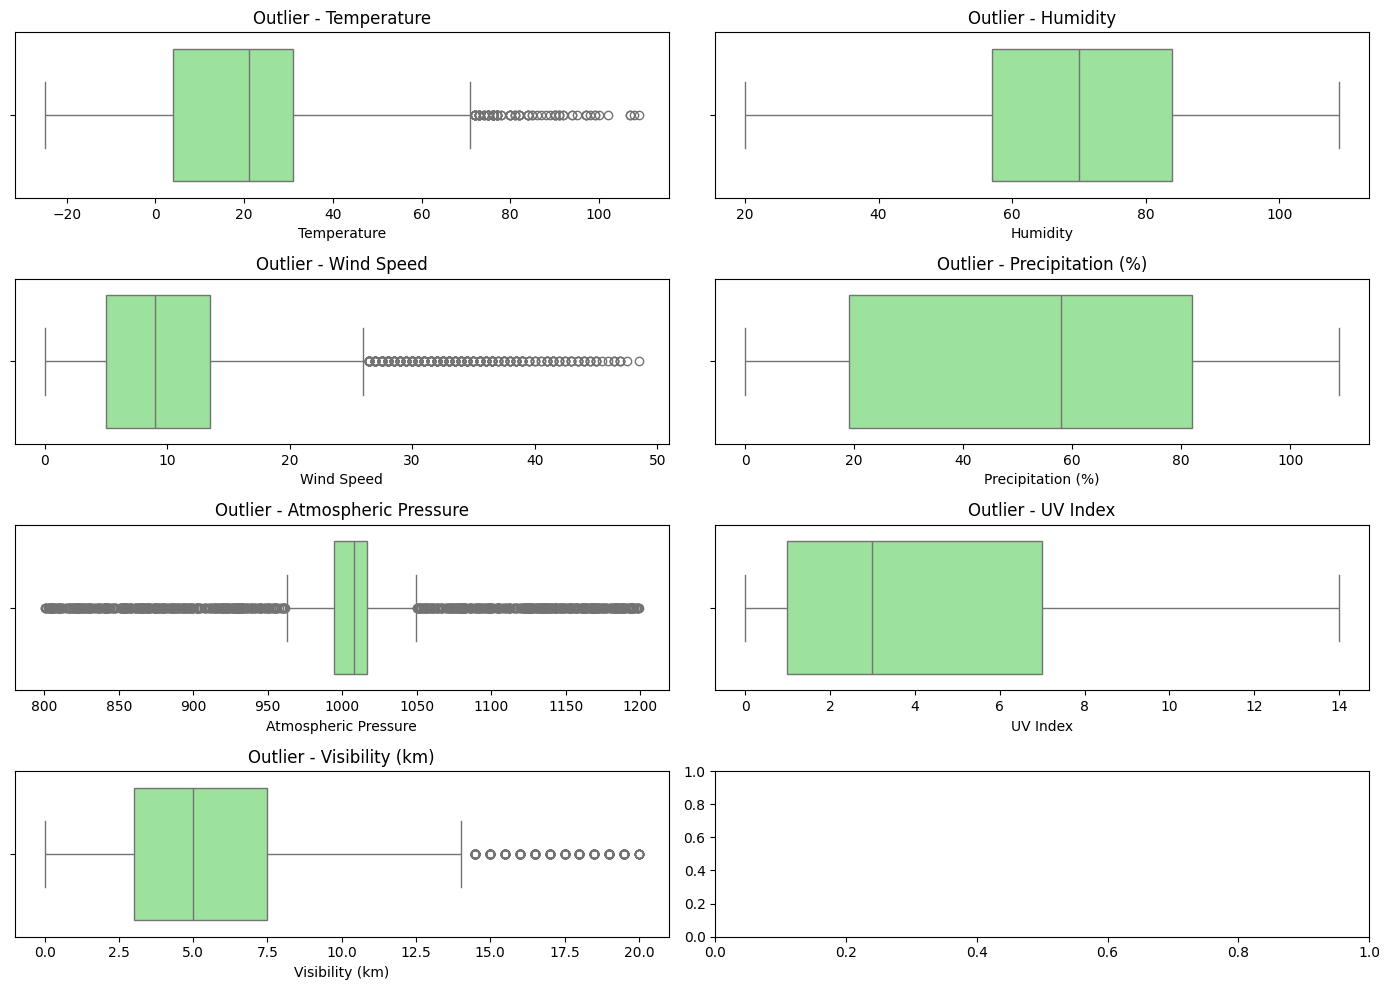

In [13]:
cols = [
    'Temperature',
    'Humidity',
    'Wind Speed',
    'Precipitation (%)',
    'Atmospheric Pressure',
    'UV Index',
    'Visibility (km)'
    ]

fig, axes = plt.subplots(4, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Outlier - {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


## Data Preparation

### Data Preprocessing

Kode ini digunakan untuk mengecek apakah di dalam kolom yang ada di df terdapat missing value, kemudian di print atau ditampilkan

In [14]:
missing_values = df.isnull().sum()
print(missing_values)

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


Kode ini digunakan untuk mengecek atau memeriksa tipe data dari setiap kolom yang ada di variabel df, dan terdapat 3 tipe data yaitu float, int, dan object.

In [16]:
data_types = df.dtypes
print(data_types)

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object


#### Menghapus Outlier Data

Kode ini mendefinisikan dan menerapkan fungsi untuk menghapus outlier dari dataset menggunakan metode IQR (Interquartile Range), yaitu salah satu metode paling umum dalam statistik. Untuk menghapusnya sendiri seperti menghapus baris-baris yang mengandung nilai outlier pada kolom-kolom yang ditentukan, berdasarkan rumus IQR. Jika sebelum dihapus datanya ada 13.200 setelah dihapus outliernya datanya menjadi 11586.

In [19]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, cols)

print("Data setelah menghapus outlier:", df_cleaned.shape)


Data setelah menghapus outlier: (11586, 11)


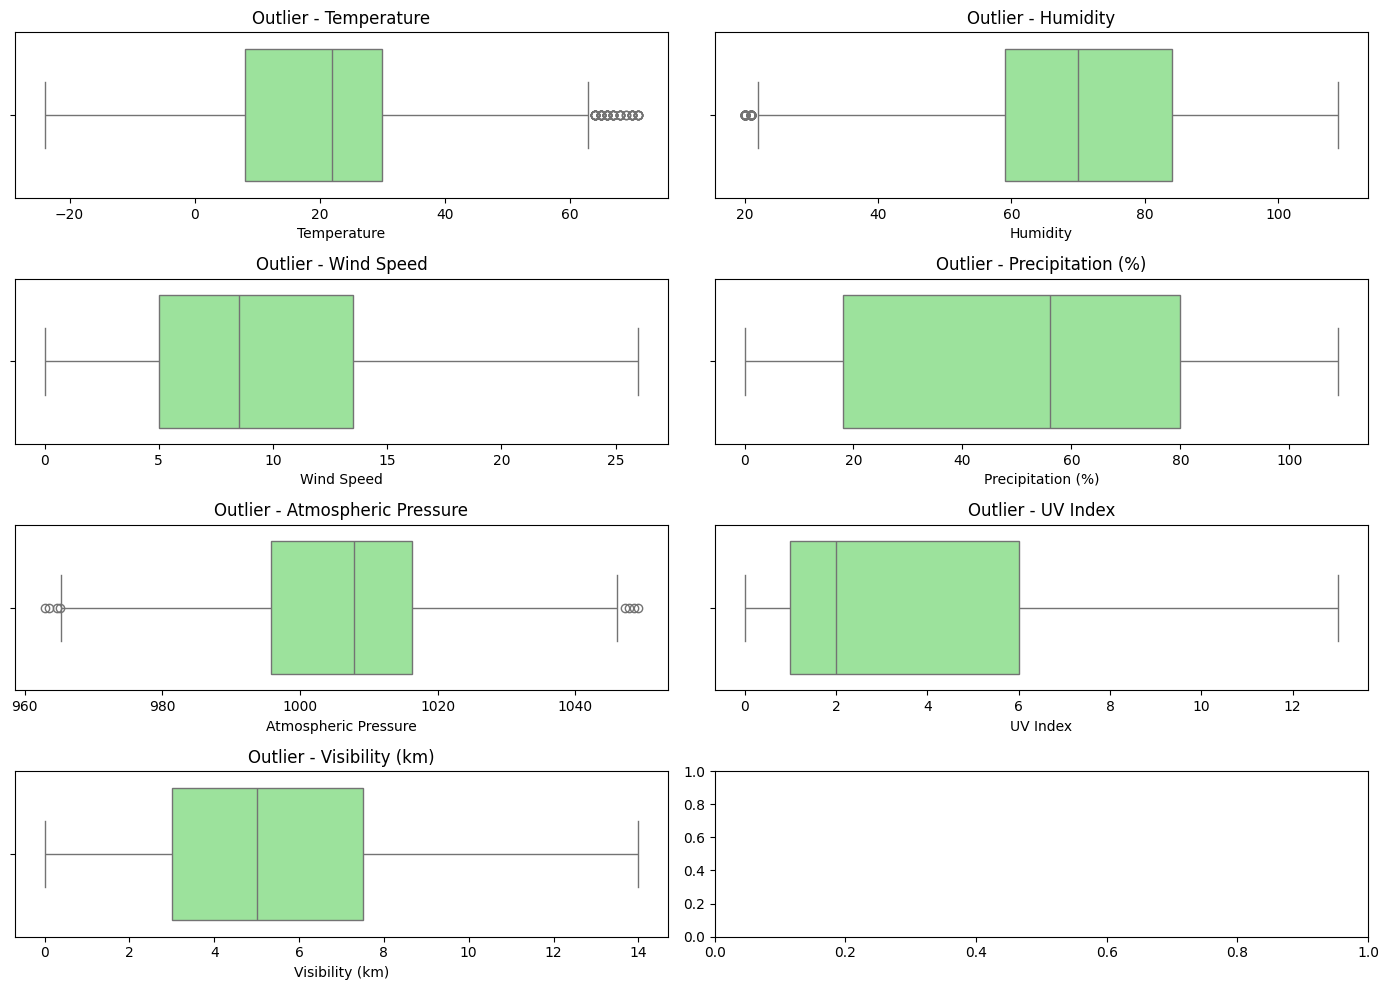

In [21]:
cols = [
    'Temperature',
    'Humidity',
    'Wind Speed',
    'Precipitation (%)',
    'Atmospheric Pressure',
    'UV Index',
    'Visibility (km)'
    ]

fig, axes = plt.subplots(4, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=df_cleaned, x=col, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Outlier - {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

Kode di bawah ini digunakan untuk mengubah data kategorikal menjadi data numerik agar bisa digunakan dalam algoritma machine learning yang hanya menerima input angka. Kolom-kolom 'Weather Type', 'Season', 'Location', dan 'Cloud Cover' dikodekan ke bentuk numerik. Di sini digunakan Label Encoding dari scikit-learn, yang mengubah setiap nilai unik menjadi angka (misalnya: ['Sunny', 'Rainy', 'Cloudy'] jadi [2, 1, 0]).

In [24]:
label_cols = ['Weather Type', 'Season', 'Location', 'Cloud Cover']
le = LabelEncoder()

for col in label_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

Kode ini digunakan untuk memisahkan fitur (X) dan target (y), lalu membagi data menjadi data latih dan data uji — langkah penting dalam proses pembuatan model machine learning.

In [26]:
X = df_cleaned.drop('Weather Type', axis=1)
y = df_cleaned['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kode ini menggunakan MinMaxScaler dari library scikit-learn untuk menstandarisasi atau menskalakan fitur dalam dataset agar berada dalam rentang tertentu, biasanya antara 0 dan 1.

In [27]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
X_train

array([[0.53684211, 0.57303371, 0.67307692, ..., 1.        , 0.17857143,
        1.        ],
       [0.51578947, 0.14606742, 0.05769231, ..., 1.        , 0.64285714,
        0.5       ],
       [0.51578947, 0.31460674, 0.25      , ..., 1.        , 0.71428571,
        0.5       ],
       ...,
       [0.4       , 0.56179775, 0.53846154, ..., 0.33333333, 0.60714286,
        0.        ],
       [0.52631579, 0.46067416, 0.51923077, ..., 0.        , 0.14285714,
        0.5       ],
       [0.52631579, 0.34831461, 0.55769231, ..., 0.33333333, 0.39285714,
        1.        ]])

## Modelling

Kode ini digunakan untuk membuat sebuah dictionary bernama models yang berisi tiga model machine learning berbeda. Setiap model diinisialisasi dengan parameter tertentu. Model yang digunakan antara lain : Logistic Regression, Decision Tree, XGBoost. 

In [39]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

Kode ini melakukan pelatihan dan prediksi untuk setiap model yang ada dalam dictionary models, dan menyimpan hasilnya ke dalam dictionary trained_models dan predictions.

In [ ]:
trained_models = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    trained_models[name] = model
    predictions[name] = y_pred

e:\2. SOFTWARE\16. Python\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:24:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Evaluasi

Kode ini melakukan evaluasi untuk setiap model yang telah dilatih, dengan menampilkan laporan klasifikasi dan confusion matrix. Pertama, untuk setiap model, kode ini mengambil hasil prediksi dan model yang telah dilatih. Kemudian, menampilkan laporan klasifikasi (precision, recall, F1-score) dengan menggunakan classification_report, serta confusion matrix untuk melihat distribusi prediksi dan kesalahan klasifikasi. Confusion matrix ditampilkan dalam bentuk plot dengan label yang sesuai. Hasil evaluasi ini memberikan gambaran lengkap mengenai kinerja tiap model pada data uji.


=== Evaluation for Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       597
           1       0.92      0.95      0.94       574
           2       0.97      0.98      0.98       546
           3       0.95      0.91      0.93       601

    accuracy                           0.94      2318
   macro avg       0.94      0.94      0.94      2318
weighted avg       0.94      0.94      0.94      2318



<Figure size 600x400 with 0 Axes>

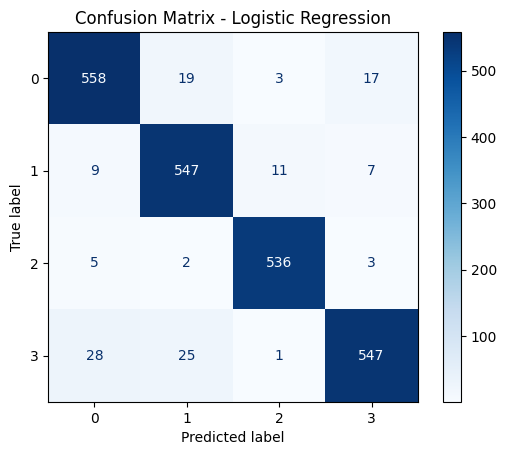


=== Evaluation for Decision Tree ===
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       597
           1       0.97      0.96      0.96       574
           2       0.99      0.98      0.98       546
           3       0.98      0.98      0.98       601

    accuracy                           0.97      2318
   macro avg       0.97      0.97      0.97      2318
weighted avg       0.97      0.97      0.97      2318



<Figure size 600x400 with 0 Axes>

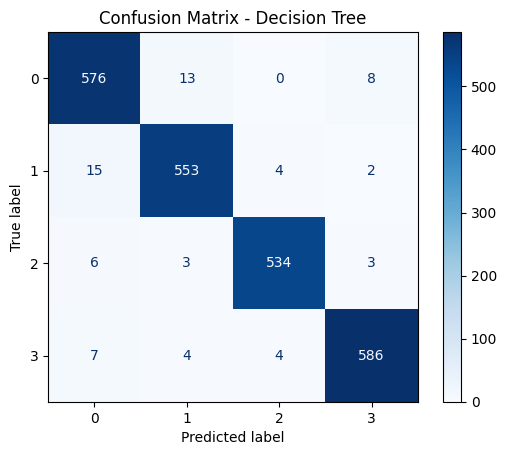


=== Evaluation for XGBoost ===
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       597
           1       0.98      0.96      0.97       574
           2       0.99      0.98      0.98       546
           3       0.98      0.98      0.98       601

    accuracy                           0.97      2318
   macro avg       0.97      0.97      0.97      2318
weighted avg       0.97      0.97      0.97      2318



<Figure size 600x400 with 0 Axes>

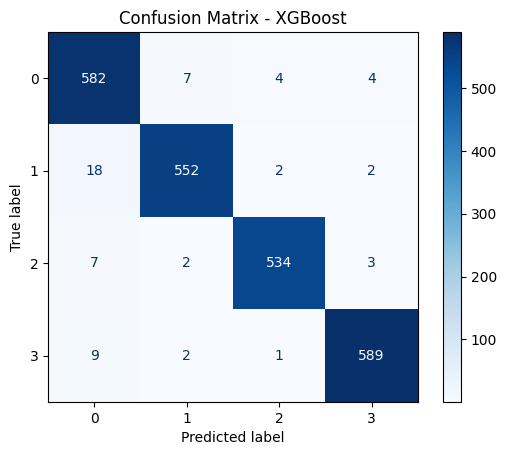

In [ ]:
for name in trained_models:
    print(f"\n=== Evaluation for {name} ===")
    
    y_pred = predictions[name]
    model = trained_models[name]
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    plt.figure(figsize=(6, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

## Hasil

Hasil evaluasi menunjukkan bahwa ketiga model (Logistic Regression, Decision Tree, dan XGBoost) memiliki kinerja yang sangat baik. 
- Logistic Regression memiliki akurasi 94%, dengan precision, recall, dan F1-score yang konsisten tinggi di seluruh kelas, meskipun sedikit lebih rendah dibandingkan Decision Tree dan XGBoost. 
- Decision Tree dan XGBoost keduanya memiliki akurasi 97%, dengan precision, recall, dan F1-score yang hampir sempurna di semua kelas. 
- XGBoost sedikit lebih unggul dalam precision untuk beberapa kelas. Secara keseluruhan, Decision Tree dan XGBoost memberikan kinerja terbaik dengan nilai yang sangat mirip, namun XGBoost sedikit lebih baik dalam beberapa metrik.